# AST 7939 Week 7

## Unsupervised Learning: Clustering

### k-means clustering

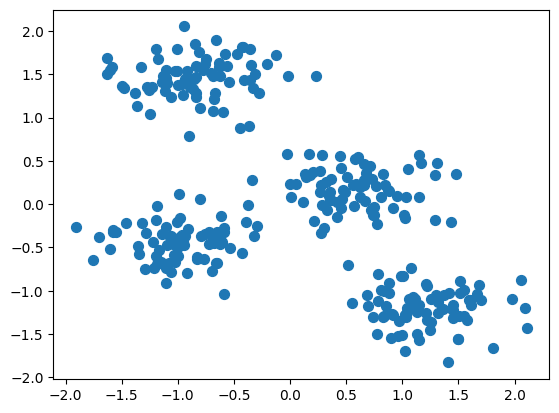

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

### Making a k-means model

In [79]:
from sklearn.cluster import KMeans

# KMeans will run "n_init" times and it will give the best result based on the inertia
model = KMeans(n_clusters=4, n_init = 10)

In [80]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

### Let's look at the labels assigned by KMeans.

In [81]:
labels = model.fit_predict(X)
labels

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0], d

### How many unique labels are there?

In [82]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

### We can look at the cluster centers.

In [83]:
centroids = model.cluster_centers_
centroids

array([[-0.96619422, -0.43906093],
       [ 1.21774671, -1.19712077],
       [-0.83691948,  1.46193015],
       [ 0.58536699,  0.17425154]])

### Let's visualize the results by plotting the data colored by the labels. We will also plot the cluster centers.

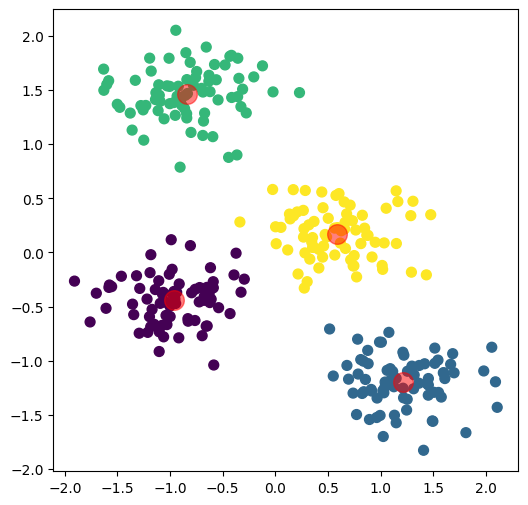

In [84]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5)

plt.savefig('clusters.png', dpi=300, transparent=True)

### What is the inertia for this model?

In [85]:
model.inertia_

56.02477057509952

### `make_blobs` comes with labels attached. Let's evaluate the performance of the clustering.

In [86]:
#This is the ground truth label.
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [87]:
from sklearn.metrics import accuracy_score

accuracy_score(y, labels)

0.25

### Why do we have such a low accuracy?

The labels from k-means clustering (or any other clustering algorithms) do not have any meaning. They just tell us which cluster was identified first and which one is identified next.

Text(0.5, 1.0, 'k-means clustering')

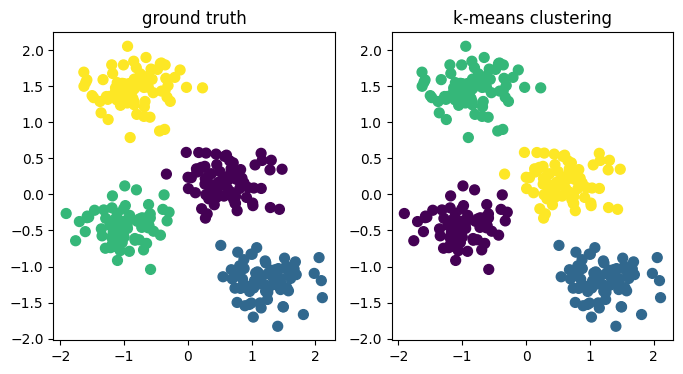

In [88]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
ax1.set_title('ground truth')

ax2.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
ax2.set_title('k-means clustering')


### What happens when we choose a sub-optimal number of clusters?

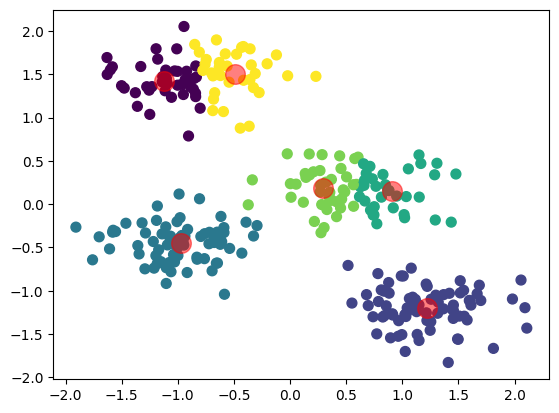

In [89]:
n_clusters = 6

model = KMeans(n_clusters = n_clusters)
model.fit(X)
labels = model.predict(X)
centers = model.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### What is the inertia for this model and how does this compare when we use n_clusters = 4?

In [90]:
model.inertia_

41.846884253875956

### Let's check out how inertia varies as a function of n_cluster.

In [91]:
kmeans_k = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(2, 11)]
inertias = [model.inertia_ for model in kmeans_k]

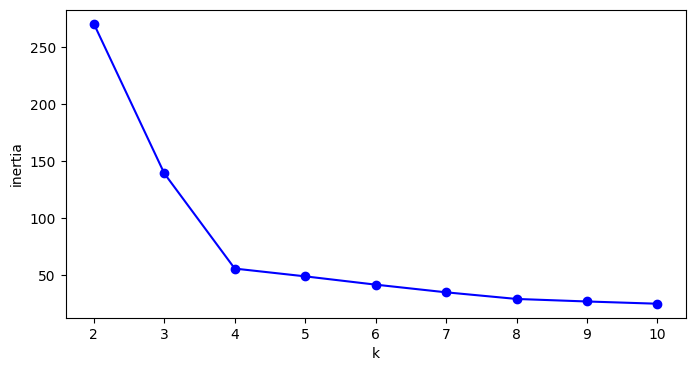

In [92]:
plt.figure(figsize=(8, 4))

plt.plot(range(2, 11), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

`n_cluster` = 4 seems to be the elbow (or knee) in this example, but remember that inertia always decreases as we add more clusters and it may not necessarily a good metric to find the optimal n_cluster.

### An alternative is the silhouette score.

In [93]:
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters = 4)
model.fit(X)
silhouette_score(X, model.labels_)

0.6569234398199433

### How does the silhouette score vary as a function of n_clusters?

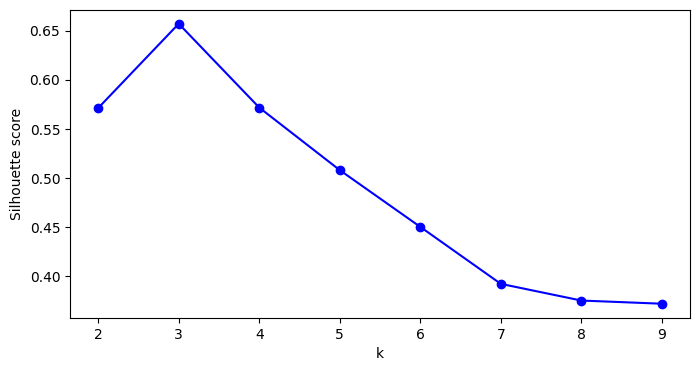

In [94]:
kmeans_k = [KMeans(n_clusters=k, random_state=0).fit(X) for k in range(2, 11)]
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_k[1:]]

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.show()

### Silhouette diagram 

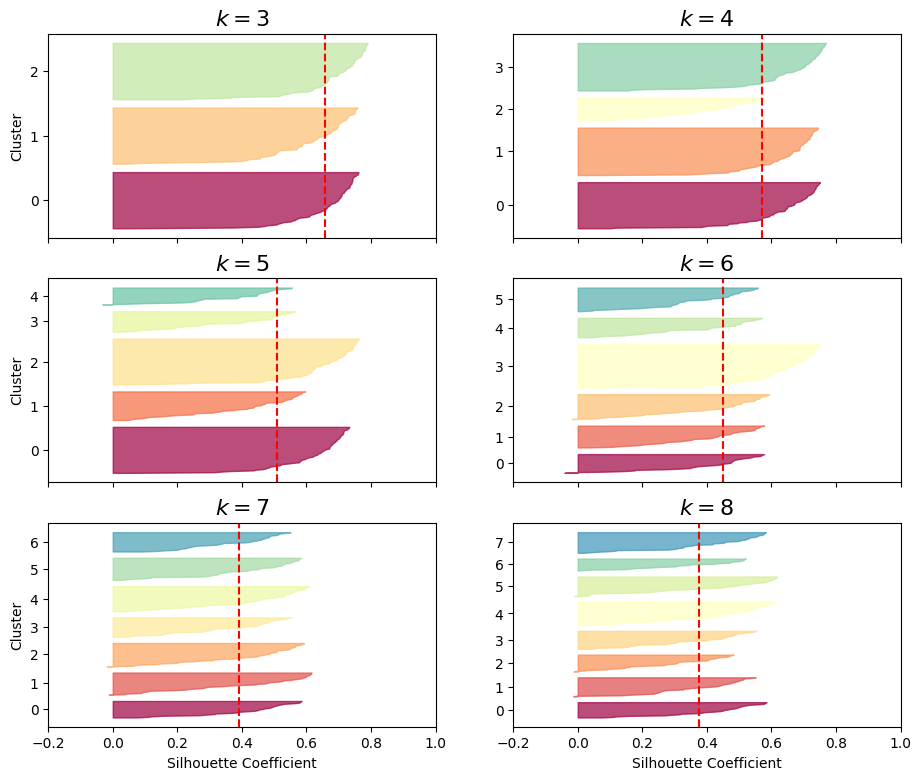

In [95]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6, 7, 8):
    plt.subplot(3, 2, k - 2)
    
    y_pred = kmeans_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5, 7):
        plt.ylabel("Cluster")
    
    if k in (7, 8):
        plt.gca().set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
    plt.xlim(-0.2,1)
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


### Is it possible to fix some of the cluster centers?

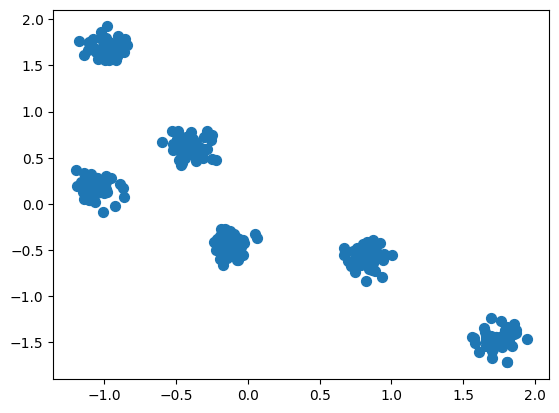

In [96]:
X, y = make_blobs(n_samples=300, centers=6, cluster_std=0.3, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

### I will manually choose 4 cluster centers and randomly pick 2 other cluster centers.

In [97]:
import random

n_clusters = 6

# Manually-chosen cluster centers
good_init = [[-1,0.25],[-0.4,0.6],[0.8,-0.6],[1.7,-1.5]]

# Adding two randomly-chosen cluster centers
good_init.append(list(X[random.randint(0,len(X)-1)]))
good_init.append(list(X[random.randint(0,len(X)-1)]))
good_init = np.array(good_init)

### Let's check out the initial cluster centers.

In [98]:
good_init

array([[-1.        ,  0.25      ],
       [-0.4       ,  0.6       ],
       [ 0.8       , -0.6       ],
       [ 1.7       , -1.5       ],
       [ 1.70818779, -1.51605153],
       [-0.42767296,  0.58044883]])

### We can also visualize the initial cluster centers.

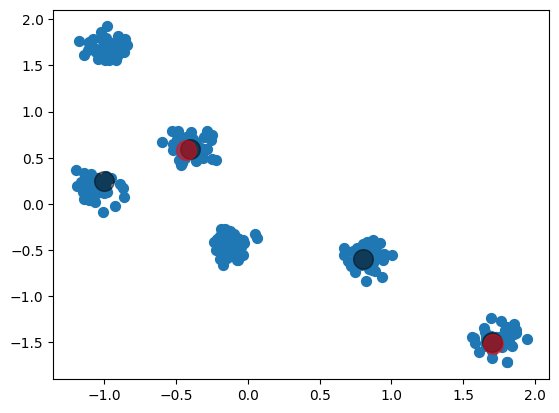

In [99]:
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.scatter(np.array(good_init)[:4, 0], np.array(good_init)[:4, 1], c='black', s=200, alpha=0.5)
plt.scatter(np.array(good_init)[4:, 0], np.array(good_init)[4:, 1], c='red', s=200, alpha=0.5)

### Let's train k-means and see how the cluster centers moved.

/home/savannahgramze/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


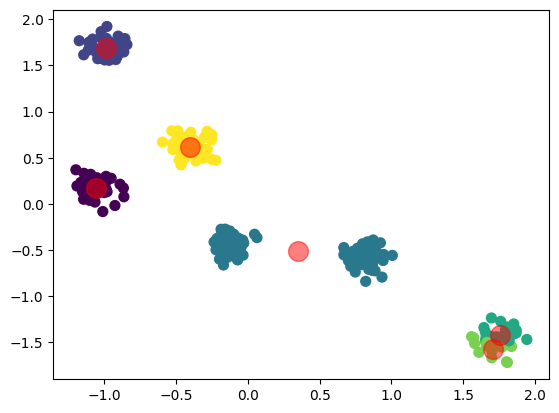

In [100]:
from sklearn.cluster import KMeans

# Note: When we give initial cluster centers, k-means will perform only one realization.
model = KMeans(n_clusters = n_clusters, init = good_init)
model.fit(X)
labels = model.predict(X)
centers = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### Let's compare initial and final cluster centers.

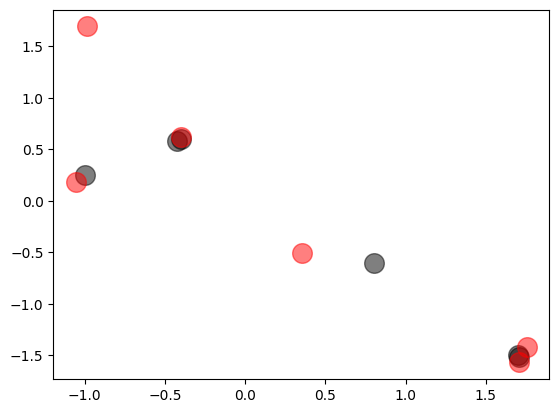

In [101]:
plt.scatter(good_init[:, 0], good_init[:, 1], c='black', s=200, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

### As you can see, cluster centers can still move around and giving initial cluster centers does not guarantee that they will stay at the same location. 

If we really "fix" some cluster centers, we will have to edit the source code (which actually shouldn't be too hard).
Alternatively, we can try to give different weights when fitting the model but exactly how we weigh the data can be subtle/subjective. See an example here though: https://medium.com/@dey.mallika/unsupervised-learning-with-weighted-k-means-3828b708d75d

### k-means on the MNIST data.

In [102]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.
X /= 255.

X.shape

(70000, 784)

### We know that there have to be 10 clusters. Let's train k-means using n_clusters=10.

In [103]:
model = KMeans(n_clusters=10, random_state=0, n_init=10)
clusters = model.fit_predict(X)

### Let's check the size of cluster centers.

In [104]:
model.cluster_centers_.shape

(10, 784)

### Let's check what the cluster centers look like.

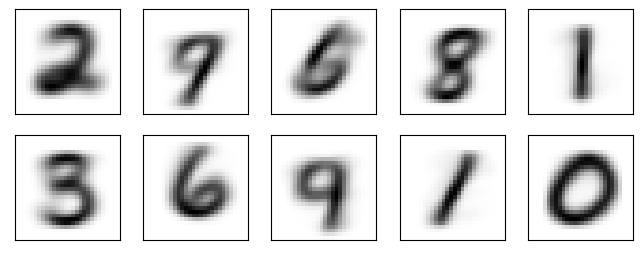

In [105]:
centers = model.cluster_centers_.reshape(10, 28, 28)

fig, ax = plt.subplots(2, 5, figsize=(8, 3))

for ax, center in zip(ax.flat, centers):
    ax.set(xticks=[], yticks=[])
    ax.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

### Can you show some members of each cluster?

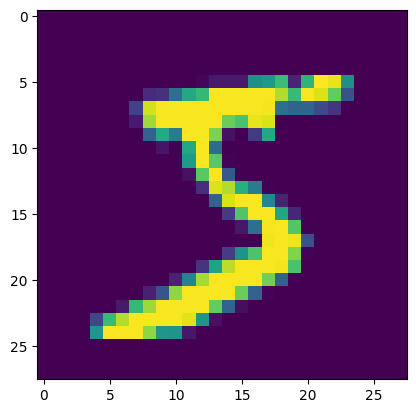

In [123]:
plt.imshow(X[0].reshape(28, 28))#.reshape(70000, 28, 28).shape

In [116]:
y.shape

(70000,)

In [131]:
model.labels_

array([3, 9, 7, ..., 1, 2, 6], dtype=int32)

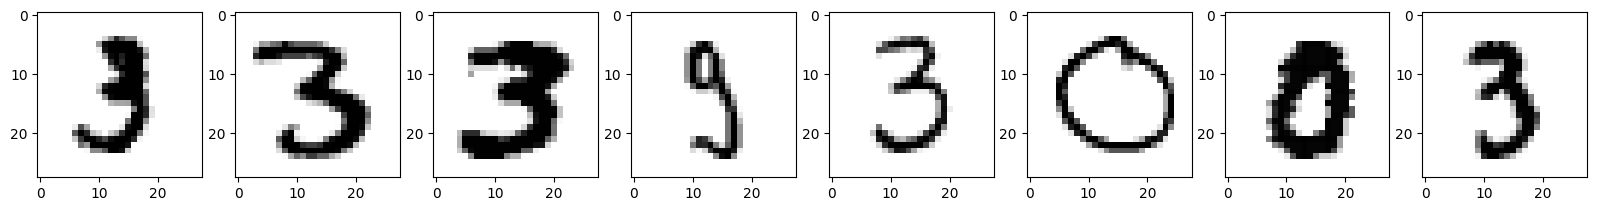

In [133]:
which_group = 5

mask = (clusters == which_group)

within_cluster = X[mask]

N_to_show = 8

fig, axes = plt.subplots(1, N_to_show, figsize=(20,5))

for i in range(N_to_show):
    axes[i].imshow(within_cluster[i,:].reshape(28, 28), cmap=plt.cm.binary)
    
plt.show()

### Gaussian mixture

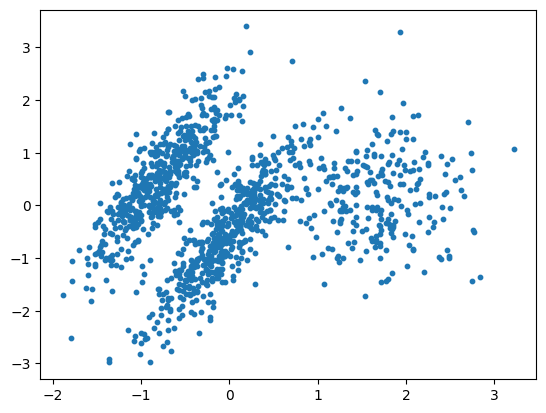

In [134]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=10)

### Making a GMM

In [135]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, n_init=10, random_state=0)
model.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=0)

### Note that n_init=1 by default in GaussianMixture. (c.f., n_init=10 by default in k-means)

In [31]:
help(GaussianMixture) # need to explicitly state if you want more than 1

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, default=1
 |      The number of mixture components.
 |  
 |  covariance_type : {'full', 'tied', 'diag', 'spherical'}, default='full'
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      - 'full': each component has 

### Let's look at the parameters that the GMM's Expectation Maximization algorithm estimated.

$p_c (x_i) = \pi_c \times e^{-(x_i-\mu_c)^2/2\sigma_c^2}$


In [136]:
model.weights_

array([0.40023303, 0.39530881, 0.20445816])

In [137]:
model.means_

array([[-0.79277512,  0.49285793],
       [-0.05075232, -0.59148672],
       [ 1.65000815,  0.17882333]])

In [138]:
model.covariances_

array([[[ 0.16146714,  0.29943792],
        [ 0.29943792,  0.76780471]],

       [[ 0.17984509,  0.33484872],
        [ 0.33484872,  0.81751775]],

       [[ 0.26938361, -0.00358415],
        [-0.00358415,  0.62344567]]])

### GMM can make predictions as to which cluster each data point belongs to (hard clustering) or the probabilities that it came from each cluster (soft clustering). 

In [139]:
model.predict(X)

array([1, 1, 0, ..., 2, 2, 2])

In [140]:
np.unique(model.predict(X))

array([0, 1, 2])

In [141]:
model.predict_proba(X)

array([[6.91186330e-07, 9.83852792e-01, 1.61465168e-02],
       [6.88401771e-04, 9.89114229e-01, 1.01973689e-02],
       [9.99910954e-01, 8.83379790e-05, 7.08029745e-07],
       ...,
       [2.45211200e-26, 6.82176892e-07, 9.99999318e-01],
       [1.81510174e-41, 1.39208780e-15, 1.00000000e+00],
       [9.09923916e-41, 4.91262282e-15, 1.00000000e+00]])

### Let's visualize the results by plotting the data colored by the labels. We will also plot the cluster centers.

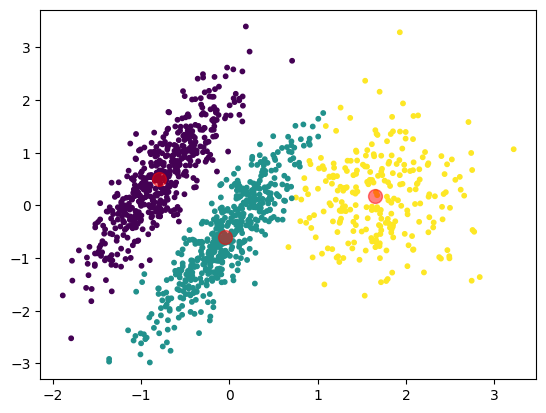

In [142]:
plt.scatter(X[:, 0], X[:, 1], c=model.predict(X), s=10, cmap='viridis')

plt.scatter(model.means_[:, 0], model.means_[:, 1], c='red', s=100, alpha=0.5)

### We can also plot the decision boundaries and the density contours of the model. 

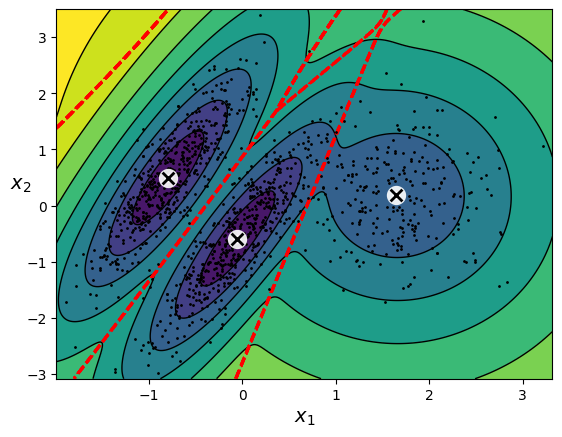

In [143]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))

    # score_samples tells you the "probability densities"
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

plot_gaussian_mixture(model, X)

### How do we determine the number of clusters?

In [144]:
model_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=0).fit(X) for k in range(1, 11)]

bics = [model.bic(X) for model in model_per_k]
aics = [model.aic(X) for model in model_per_k]

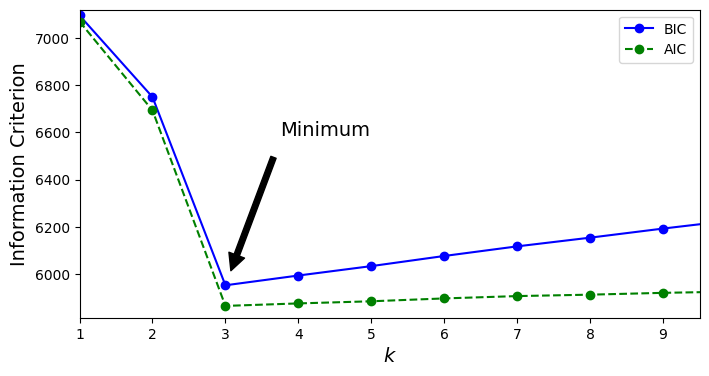

In [145]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()

### DBSCAN

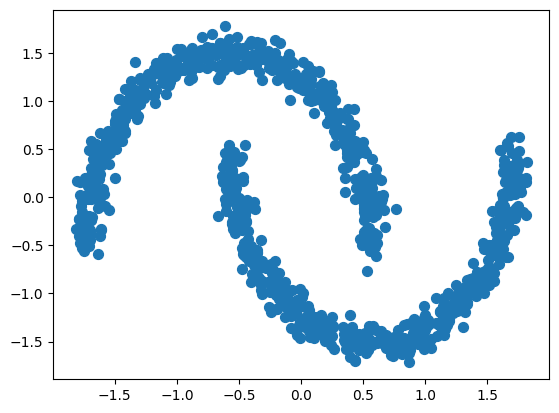

In [146]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], s=50)

In [147]:
X.shape

(1000, 2)

### Let's first check out k-means on this data.

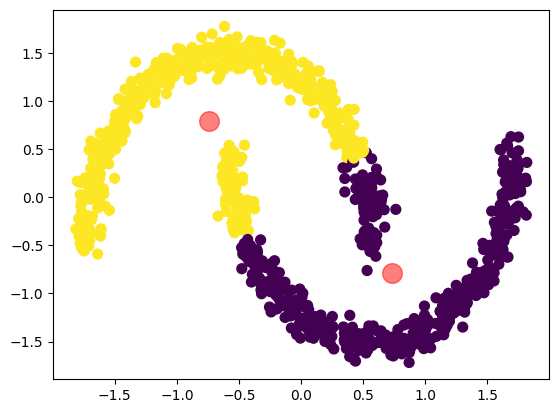

In [148]:
n_clusters = 2

model = KMeans(n_clusters = n_clusters)
model.fit(X)
labels = model.predict(X)

centers = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);


### Let's try with the default hyperparameter values (eps=0.5, min_samples=5)

In [149]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(X)

DBSCAN()

### This is to make DBSCAN plots.

In [150]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100, alpha=0.5)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

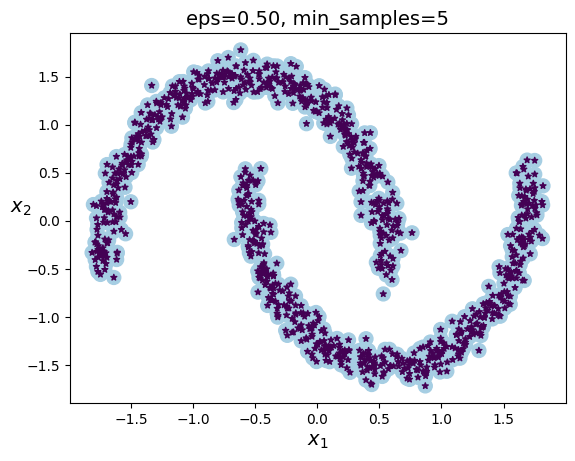

In [151]:
plot_dbscan(model, X, size=100)
plt.savefig('dbscan_eps05.png',dpi=300)

### We should reduce epsilon. Let's try eps=0.05.

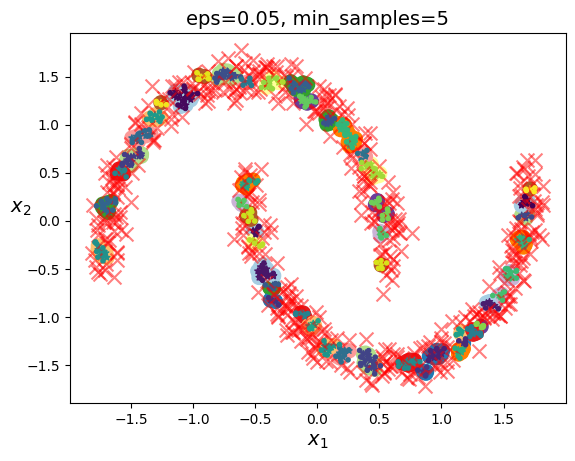

In [152]:
model = DBSCAN(eps=0.05, min_samples=5)
model.fit(X)

plot_dbscan(model, X, size=100)
plt.savefig('dbscan_eps005.png',dpi=300)

### This is the number of clusters identified.

In [153]:
len(np.unique(model.labels_))

52

### We probably went down too much. There are so many clusters (and noise). Let's try eps=0.1.

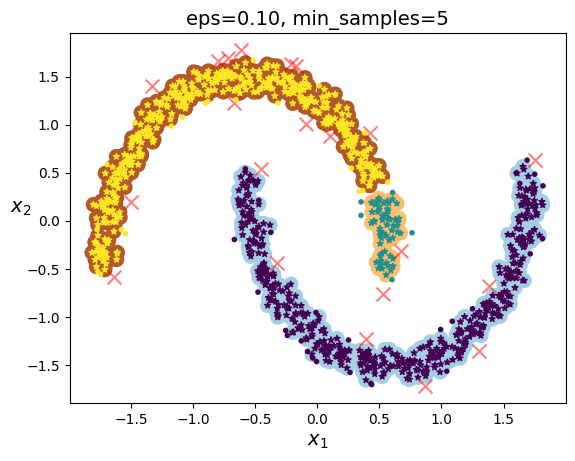

In [154]:
model = DBSCAN(eps=0.1)
model.fit(X)

plot_dbscan(model, X, size=100)
plt.savefig('dbscan_eps01.png',dpi=300)

### Okay, it looks much better, but we may want to increase epsilon a little bit more. Let's try eps=0.15.

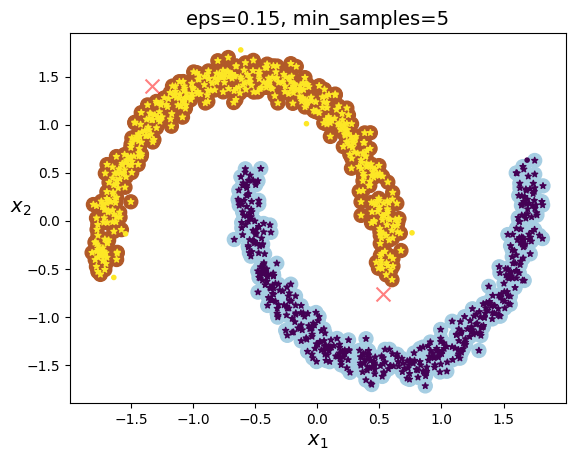

In [155]:
model = DBSCAN(eps=0.15)
model.fit(X)

plot_dbscan(model, X, size=100)
plt.savefig('dbscan_eps015.png',dpi=300)

### Perfect! But is there a better way to do the optimization?

### We can try to compute the distance to the k nearest neighbors and determine epsilon from it.

In [156]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5)
neighbors = nn.fit(X)
distances, indices = neighbors.kneighbors(X)

In [157]:
distances

array([[0.        , 0.05601663, 0.09694564, 0.10231104, 0.12350095],
       [0.        , 0.02990693, 0.04719617, 0.04918573, 0.05410785],
       [0.        , 0.02587813, 0.08486852, 0.10263596, 0.11641225],
       ...,
       [0.        , 0.01064461, 0.04981285, 0.05625014, 0.06576485],
       [0.        , 0.02195811, 0.03195652, 0.0347297 , 0.05226182],
       [0.        , 0.01994161, 0.0438595 , 0.05826747, 0.05948166]])

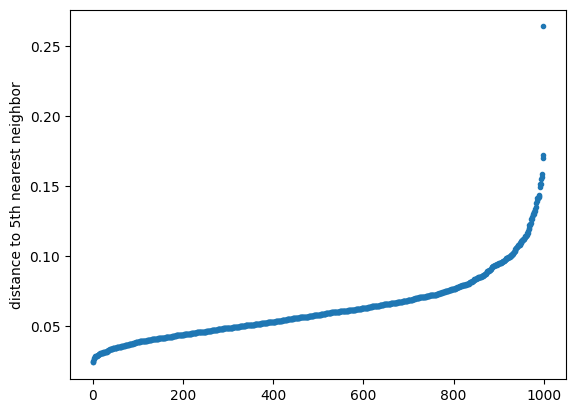

In [158]:
distances = distances[:,-1]
distances = np.sort(distances, axis=0)
plt.plot(distances, '.')
plt.ylabel('distance to 5th nearest neighbor')
plt.savefig('dbscan_distance.png',dpi=300)

### Going back to the best DBSCAN model.

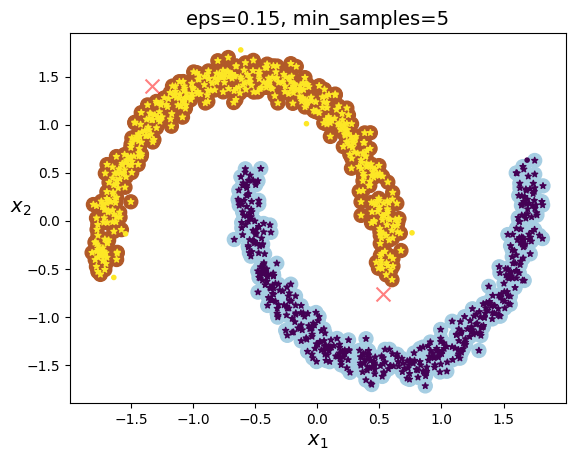

In [159]:
model = DBSCAN(eps=0.15, min_samples=5)
model.fit(X)

plot_dbscan(model, X, size=100)

### How many labels are there?

In [160]:
np.unique(model.labels_)

array([-1,  0,  1])

Note: Data points having label = -1 are noise.

### Data point classified as noise.

In [161]:
X[np.where(model.labels_ == -1)]

array([[-1.33353771,  1.40667375],
       [ 0.53143089, -0.76096869]])

### How many data points are there in each clusters (or noise)?

In [162]:
np.bincount(model.labels_+1)

array([  2, 500, 498])

### How many core samples are there?

In [163]:
len(model.components_)

992

In [164]:
model.components_

array([[ 1.75081891,  0.48393978],
       [ 1.35606443, -0.90706929],
       [-0.90150442,  1.22470664],
       ...,
       [-0.202053  , -1.16108557],
       [-0.46412461, -0.2633107 ],
       [ 0.08084456, -1.39612327]])

### Clustering for semi-supervised learning

### Let's load the MNIST data.

In [165]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X = mnist["data"]
y = mnist["target"]

X = X[::10]
y = y[::10]

# Scale the grey-scale values to be between 0 and 1 instead of 0 and 255 for better numeric stability.
X = X / 255.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape

(5250, 784)

### When we know all the ground truth answers.

In [166]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9302857142857143

We got 93% accuracy.

### When we know answers only to 100 data points.

In [167]:
from sklearn.ensemble import RandomForestClassifier

n_labeled = 100

model = RandomForestClassifier(n_estimators=100, random_state=0)

# Here, I'm fitting the model using only 100 data points.
model.fit(X_train[:n_labeled], y_train[:n_labeled])

# Then I'm returning the accuracy of the model on the test dataset.
model.score(X_test, y_test)

0.66

We got only 66 % accuracy.


### Let's create 100 clusters.

In [168]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_labeled, random_state=0)

# X_digits_dist will save the distance from each data point to each cluster centers.
X_digits_dist = kmeans.fit_transform(X_train)

# Here, I'm choosing the data point that is the closest to each cluster center.
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [169]:
X_digits_dist

array([[ 7.99617829,  8.5816781 , 10.27796137, ...,  9.45728531,
         9.50163345,  7.64184407],
       [ 7.44708523,  8.50516536,  7.97578882, ...,  9.4388953 ,
         7.8667414 ,  6.31652231],
       [ 7.20776386,  7.71123562,  7.65627833, ...,  9.59950427,
         7.7418938 ,  6.52350547],
       ...,
       [ 8.4363966 , 10.52682079,  9.42079967, ...,  8.57963878,
         8.69545135,  8.66733268],
       [ 7.07889833,  6.26872771,  5.56034953, ...,  9.19767861,
         7.82288256,  8.4971332 ],
       [ 7.64837414,  9.04360898,  8.82360797, ...,  8.50242799,
         7.50350601,  6.35188148]])

In [170]:
representative_digit_idx

array([4374, 4842, 4871, 4283, 3095,  574, 3425, 3166, 4474, 1929, 2630,
       1966, 1168, 1781, 2373, 2293,  841, 4666, 1856, 1139, 2685, 1593,
        960, 2670, 1434, 3455,  985, 4565, 4778, 2992, 1274, 1562, 5189,
        721,   72, 4961, 1085, 4839, 3073, 1983, 4592, 2434,  381,  153,
       3050, 1834,  177,  206, 3964, 5217, 2798, 1670, 3933, 3348, 2448,
        421, 1932, 1226, 3737,  735, 5007, 2270, 5110,  140, 4822, 3109,
       2454, 1988,  711, 1254,  248, 1748, 3003, 2752,  585, 5077,  271,
       3695, 4101, 1426, 4012, 3452, 4459, 4982,  995, 2135, 1782, 4307,
        595, 3848, 2483, 3028, 1135, 5209, 3609, 3963,  573,  664, 3019,
         53])

In [171]:
X_representative_digits.shape

(100, 784)

Okay, so there are only 100 data points, one per cluster.

### These are the representative data points.

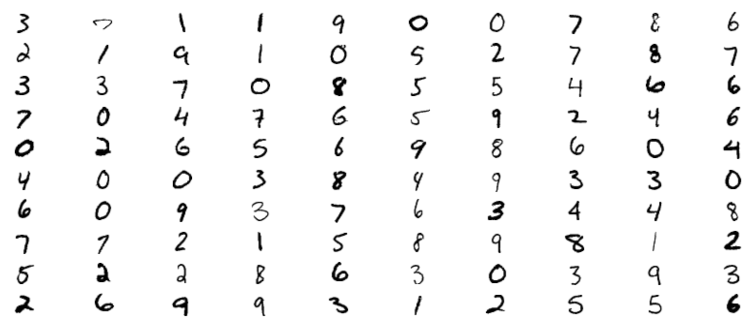

In [172]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(n_labeled // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')


### And these are their ground truth values.

In [173]:
y_train[representative_digit_idx]

array([3, 7, 1, 1, 9, 0, 0, 7, 8, 6, 2, 1, 9, 1, 0, 5, 2, 7, 8, 7, 3, 3,
       7, 0, 8, 5, 5, 4, 6, 6, 7, 0, 4, 7, 6, 5, 9, 2, 4, 6, 0, 2, 6, 5,
       6, 9, 8, 6, 0, 4, 4, 0, 0, 3, 8, 4, 9, 3, 3, 0, 6, 0, 9, 3, 7, 6,
       3, 4, 4, 8, 7, 7, 2, 1, 5, 8, 9, 8, 1, 2, 5, 2, 2, 8, 6, 3, 0, 3,
       9, 3, 2, 6, 9, 9, 3, 1, 2, 5, 5, 6], dtype=uint8)

### I will save them in y_representative_digits.

In [174]:
y_representative_digits = y_train[representative_digit_idx]

### Now we have a dataset with just 100 labeled data points, but instead of being completely random instances, each of them is a representative image of its cluster. Let's see if the performance is any better.

In [175]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_representative_digits, y_representative_digits)
model.score(X_test, y_test)

0.7714285714285715

The score itself is not outstanding, but it's about 11 % better!


### Label propagation

77 % accuracy is still poor compared with the fully supervised classification result (93 %). Let's propagate the labels to all the other instances in the same cluster and see if that improves the performance.

In [176]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(n_labeled):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [177]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train_propagated)
model.score(X_test, y_test)

0.8474285714285714

### This is good, but by propagating labels to all the data points we should have "mis-labeled" some of the data points. What if we propagate the labels to only certain fraction of the data points (95% in this example) that are closest to the cluster centers?

In [178]:
percentile_closest = 95

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(n_labeled):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [179]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [180]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train_partially_propagated, y_train_partially_propagated)
model.score(X_test, y_test)

0.8565714285714285